# Problem Statement

Heart disease is a leading cause of death worldwide. This project aims to use Machine Learning to predict the presence of heart disease based on patient medical attributes such as age, cholesterol, blood pressure, ECG results, and exercise-related features.

The target variable, heart_disease_present, is binary, where 0 indicates no heart disease and 1 indicates the presence of heart disease. This is a supervised binary classification problem in the healthcare domain.

Accurate prediction is critical, as false negatives can delay treatment. Therefore, evaluation metrics such as ROC–AUC and the confusion matrix are used instead of relying only on accuracy.

In [1]:
import pandas as pd

In [2]:
labels_df=pd.read_csv("labels.csv")
values_df=pd.read_csv("values.csv")

In [3]:
labels_df.head

<bound method NDFrame.head of     patient_id  heart_disease_present
0       0z64un                      0
1       ryoo3j                      0
2       yt1s1x                      1
3       l2xjde                      1
4       oyt4ek                      0
..         ...                    ...
175     5qfar3                      1
176     2s2b1f                      1
177     nsd00i                      1
178     0xw93k                      0
179     2nx10r                      0

[180 rows x 2 columns]>

In [4]:
values_df.head

<bound method NDFrame.head of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128           

In [5]:
data=pd.merge(values_df,labels_df,on="patient_id",how="inner")

In [6]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [7]:
data.shape
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [8]:
data["heart_disease_present"].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [9]:
data["heart_disease_present"].value_counts(normalize=True)*100

heart_disease_present
0    55.555556
1    44.444444
Name: proportion, dtype: float64

The target variable shows a relatively balanced distribution with approximately 56% non-disease cases and 44% disease cases. Although not severely imbalanced, evaluation metrics such as ROC-AUC and recall are prioritized due to the medical risk associated with false negatives.

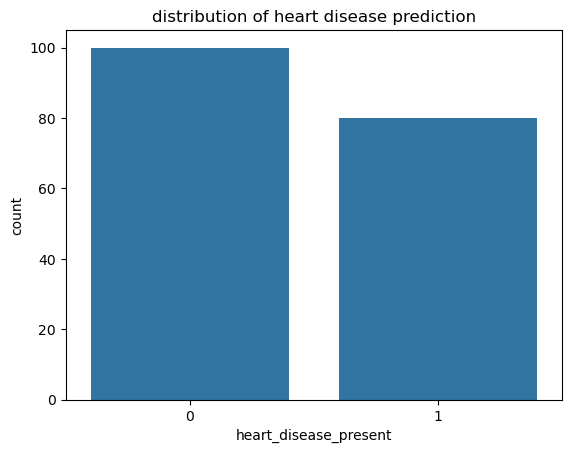

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="heart_disease_present",data=data)
plt.title("distribution of heart disease prediction")
plt.show()

In [11]:
data.shape

(180, 15)

In [12]:
data.info

<bound method DataFrame.info of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128         

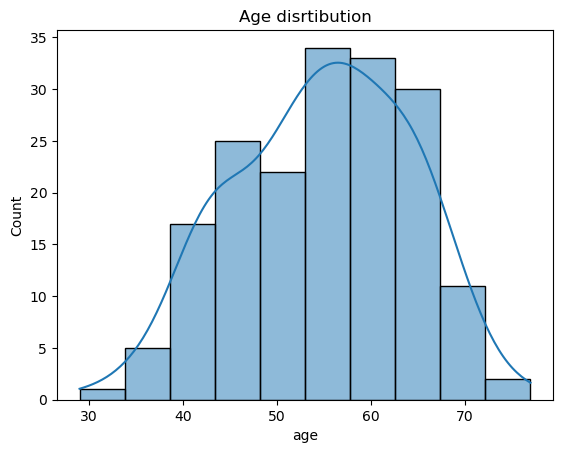

In [13]:
sns.histplot(data["age"],bins=10,kde=True)
plt.title("Age disrtibution")
plt.show()

Each bar represents the count of patients within a small age interval (bin). Multiple bars appear within ranges like 30–40 because the data is divided into several equal-width bins to show detailed distribution.

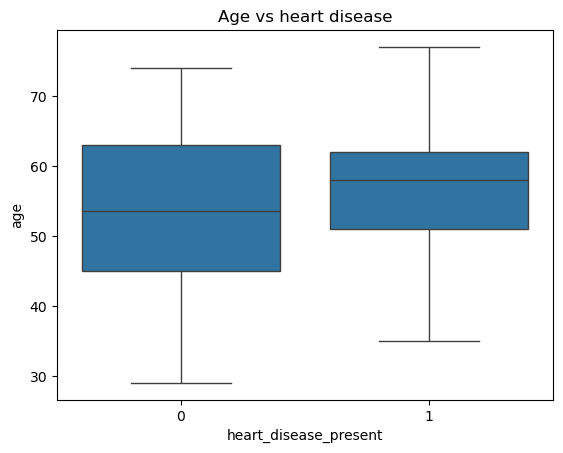

In [14]:
sns.boxplot(x="heart_disease_present",y="age",data=data)
plt.title("Age vs heart disease")
plt.show()

The box plot shows that patients with heart disease generally have a higher median age compared to those without
heart disease, indicating age is a significant risk factor.

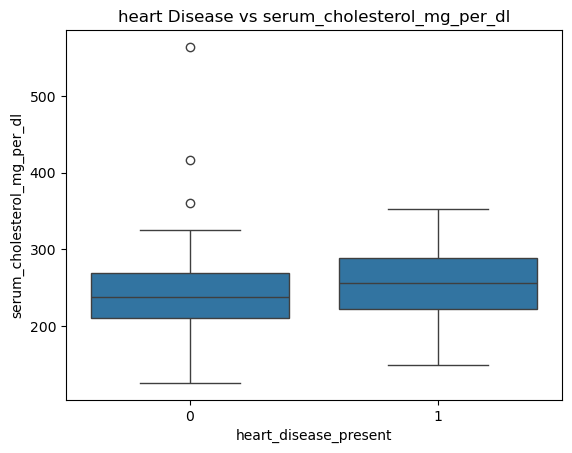

In [15]:
sns.boxplot(x="heart_disease_present",y="serum_cholesterol_mg_per_dl",data=data)
plt.title("heart Disease vs serum_cholesterol_mg_per_dl")
plt.show()

The box plot indicates that patients with heart disease generally have slightly higher serum cholesterol levels, although considerable overlap exists between the two groups, suggesting cholesterol is a contributing but not decisive factor.

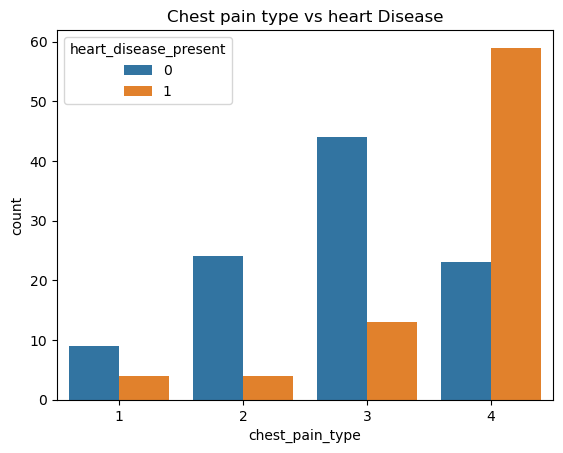

In [16]:
sns.countplot(x="chest_pain_type",hue="heart_disease_present",data=data)
plt.title("Chest pain type vs heart Disease")
plt.show()

The count plot shows a strong relationship between chest pain type and heart disease, with chest pain type 4 having the highest number of heart disease cases.

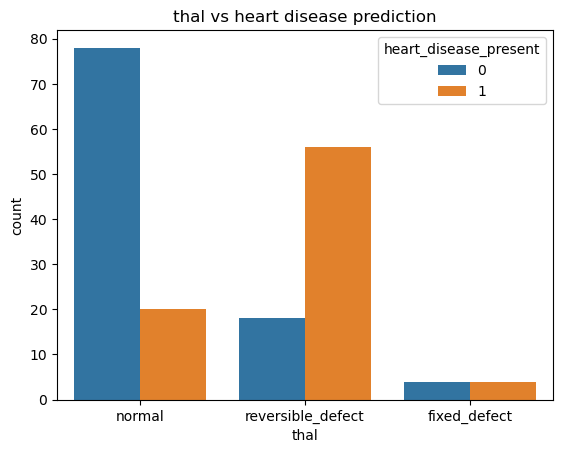

In [17]:
sns.countplot(x="thal",hue="heart_disease_present",data=data)
plt.title("thal vs heart disease prediction")
plt.show()

Thalassemia test result is highly correlated with heart disease.Patients with a reversible thal defect show a significantly higher occurrence of heart disease compared to those with normal thal results.

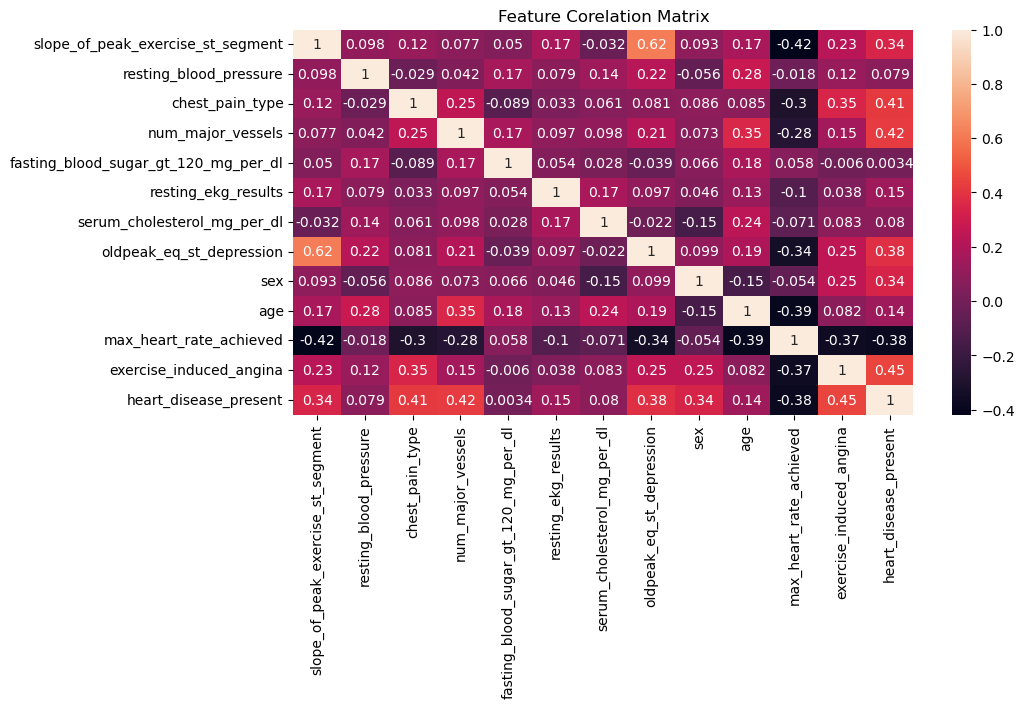

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop(columns=["patient_id","thal"]).corr(),annot=True)
plt.title("Feature Corelation Matrix")
plt.show()

Correlation analysis was performed only on numerical features, as correlation coefficients are not meaningful for categorical variables such as thal. Categorical features were analyzed separately using count plots against the target variable.

Correlation analysis indicates that exercise-induced angina, number of major vessels, chest pain type, and ST depression are strongly associated with the presence of heart disease. Maximum heart rate achieved shows a moderate negative correlation, suggesting healthier cardiovascular response in non-diseased patients. No severe multicollinearity was observed among numerical features.

In [19]:
x=data.drop(columns=["heart_disease_present","patient_id"])
y=data["heart_disease_present"]

In [20]:
x_encoded=pd.get_dummies(x,columns=["thal"],drop_first=True)

In [21]:
numerical_features = [
    "age",
    "resting_blood_pressure",
    "serum_cholesterol_mg_per_dl",
    "max_heart_rate_achieved",
    "oldpeak_eq_st_depression"
]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x_encoded,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
x_train[numerical_features]=scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features]=scaler.transform(x_test[numerical_features])

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model=LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
    
)

In [27]:
lr_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Class predictions

In [28]:
y_pred=lr_model.predict(x_test)

In [29]:
y_proba=lr_model.predict_proba(x_test)[:,1]

 ROC-AUC requires probabilities, not class labels.

### Evaluate the Model

In [30]:
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
roc_auc_score,
classification_report
)

In [31]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [32]:
roc_auc_score(y_test,y_proba)

np.float64(0.940625)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[16  4]
 [ 2 14]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.78      0.88      0.82        16

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



The Logistic Regression model achieved an accuracy of 83% and a ROC-AUC score of 0.94, indicating strong discriminatory power. The confusion matrix shows that the model correctly identified 14 out of 16 heart disease cases, resulting in a recall of 88% for the positive class. Given the medical context, the low number of false negatives demonstrates the model’s suitability as a baseline classifier.

## Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model=RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

In [37]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [38]:
y_pred_rf=rf_model.predict(x_test)
y_prob_rf=rf_model.predict_proba(x_test)[:,1]

In [39]:
accuracy_score(y_test,y_pred_rf)

0.8611111111111112

In [40]:
confusion_matrix(y_test,y_pred_rf)

array([[16,  4],
       [ 1, 15]])

In [41]:
roc_auc_score(y_test,y_prob_rf)

np.float64(0.95)

In [42]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



Random Forest was selected as the final model as it achieved the highest ROC-AUC score (0.95) and reduced false negatives to one. Given the medical context where missing heart disease cases is critical, the model’s high recall of 94% for the positive class makes it more suitable than Logistic Regression

# Gradient Boosting Classifier (GBM)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc_model=GradientBoostingClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=3,
    learning_rate=0.1
)

In [45]:
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
y_pred_gbc=gbc_model.predict(x_test)
y_prob_gbc=gbc_model.predict_proba(x_test)[:,1]

In [47]:
accuracy_score(y_test,y_pred_gbc)

0.9166666666666666

In [48]:
confusion_matrix(y_test,y_pred_gbc)

array([[17,  3],
       [ 0, 16]])

In [49]:
roc_auc_score(y_test,y_prob_gbc)

np.float64(0.953125)

In [50]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



Among all evaluated models, Gradient Boosting Classifier achieved the best performance with an accuracy of 92% and ROC-AUC of 0.953. Most importantly, the model achieved a recall of 100% for heart disease cases, eliminating false negatives (0). Given the healthcare context where missing disease cases is critical, Gradient Boosting was selected as the final model.

Although results are strong, performance may vary on larger unseen data. Cross-validation and external validation are recommended.

# Feature Importance

In [51]:
import pandas as pd
feature_importance=pd.DataFrame({
    "Feature":x_train.columns,
    "importance":gbc_model.feature_importances_
}).sort_values(by="importance",ascending=False)
feature_importance

,Feature,importance
12,thal_normal,0.203072
2,chest_pain_type,0.165303
9,age,0.112952
10,max_heart_rate_achieved,0.103702
7,oldpeak_eq_st_depression,0.096114
3,num_major_vessels,0.061639
6,serum_cholesterol_mg_per_dl,0.059184
1,resting_blood_pressure,0.047225
13,thal_reversible_defect,0.046189
8,sex,0.041796


The model relies most on diagnostic test results like thallium scan and chest pain type, while lifestyle and basic vitals have secondary influence. Some features like fasting blood sugar showed no contribution for this dataset

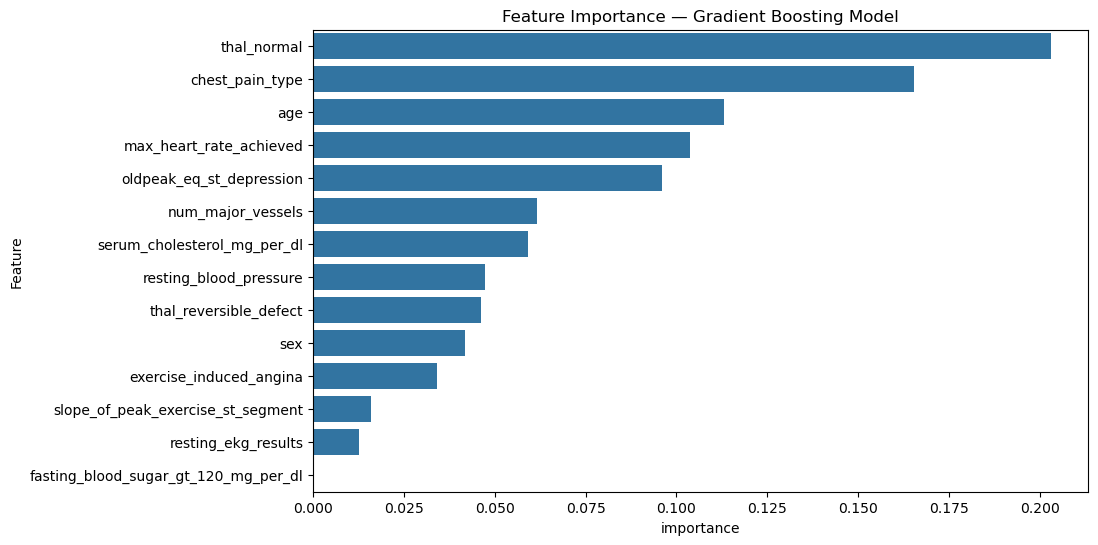

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(
    x="importance",
    y="Feature",
    data=feature_importance
)
plt.title("Feature Importance — Gradient Boosting Model")
plt.show()

Feature importance analysis revealed that thallium stress test results, chest pain type, age, maximum heart rate achieved, and ST depression were the most influential predictors of heart disease. These findings are consistent with established clinical knowledge, reinforcing the reliability and interpretability of the Gradient Boosting model.

# Final Conclusion

In this project, a machine learning–based system was developed to predict the presence of heart disease using clinical and physiological patient data. Exploratory data analysis revealed meaningful relationships between cardiovascular indicators such as chest pain type, thallium stress test results, ST depression, and heart disease occurrence.

Multiple classification models were evaluated, including Logistic Regression, Random Forest, and Gradient Boosting Classifier. Among these, the Gradient Boosting model demonstrated the best overall performance, achieving an accuracy of 92% and a ROC-AUC score of 0.953. Most importantly, the model achieved a recall of 100% for heart disease cases, eliminating false negatives. Given the healthcare context where missing disease cases can have severe consequences, this model was selected as the final solution.

Feature importance analysis showed that thallium test results, chest pain type, age, maximum heart rate achieved, and ECG-based features were the most influential predictors. These findings align well with established medical knowledge, enhancing the interpretability and reliability of the model.

In [54]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(gbc_model,f)
with open ("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)
feature_columns = x_train.columns.tolist()

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)